In [1432]:
#Car price prediction using Multiple Linear Regression in Python.

#importing some important libraries for our Project
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import r2_score

In [1434]:
#define working directory
os.chdir(r'C:\Users\Vaibhav\Documents\Portfolio\LR\CarPriceModel')

In [1435]:
#reading the csv file
df=pd.read_csv('CarPriceList.csv')

In [1437]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1438]:
#let's have a look at the shape of the data
df.shape

(205, 26)

In [1439]:
# we see there are no null values in any of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1440]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1442]:
#we need to consider only company name as the independent variable for model building

df['CarName']=df['CarName'].apply(lambda x:x.split(' ')[0])

In [1444]:
# Creating groups of car based price
#carbin=[0,7554.000000,10198.000000,16465.000000,np.inf]

In [1445]:
#labels=['standard','large','executive','Luxury']
#df['Car_group'] = pd.cut(df['price'],bins= carbin,labels = labels)

In [1447]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [1448]:
#Dropping car_ID as it is just Unique id of each observation (Interger)
df.drop('car_ID', axis=1, inplace=True)

In [1450]:
#pv_carnames=pd.pivot_table(df,index='CarName',aggfunc=np.sum)

In [1451]:
#checking the number of car count CarName wise
# we find that carname are icorrect and repeating . Hence we replace it with correct names.
#'mazda' if x=='maxda' 
#'porsche' if x=='porcshce' 
#'toyota' if x=='toyouta' 
#'volkswagen' if x=='vokswagen'
#'nissan' if x=='Nissan' 
#'volkswagen' if x=='vw'

df.CarName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
vw              2
maxda           2
porcshce        1
vokswagen       1
toyouta         1
mercury         1
Nissan          1
Name: CarName, dtype: int64

In [1452]:
df['CarName']=df['CarName'].apply(lambda x: 'mazda' if x=='maxda' 
                                       else 'porsche' if x=='porcshce' 
                                       else 'toyota' if x=='toyouta' 
                                       else 'volkswagen' if x=='vokswagen'
                                       else 'nissan' if x=='Nissan' 
                                       else 'volkswagen' if x=='vw' 
                                       else x)


In [1453]:
#checking the count with corrected names
df.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

In [1454]:
#fuel system mpfi is same as mfi .MFI stands for "multipoint fuel injection." which can also be abbreviated as MPFI.
df['fuelsystem'].value_counts()
df['fuelsystem']=df['fuelsystem'].apply(lambda x: 'mpfi' if x=='mfi' else x) 

In [1455]:
#engine type dohcv seems a typo for dohc 
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [1456]:
df['enginetype']=df['enginetype'].apply(lambda x: 'dohc' if x=='dohcv' else x)
df['enginetype'].value_counts()

ohc      148
ohcf      15
dohc      13
ohcv      13
l         12
rotor      4
Name: enginetype, dtype: int64

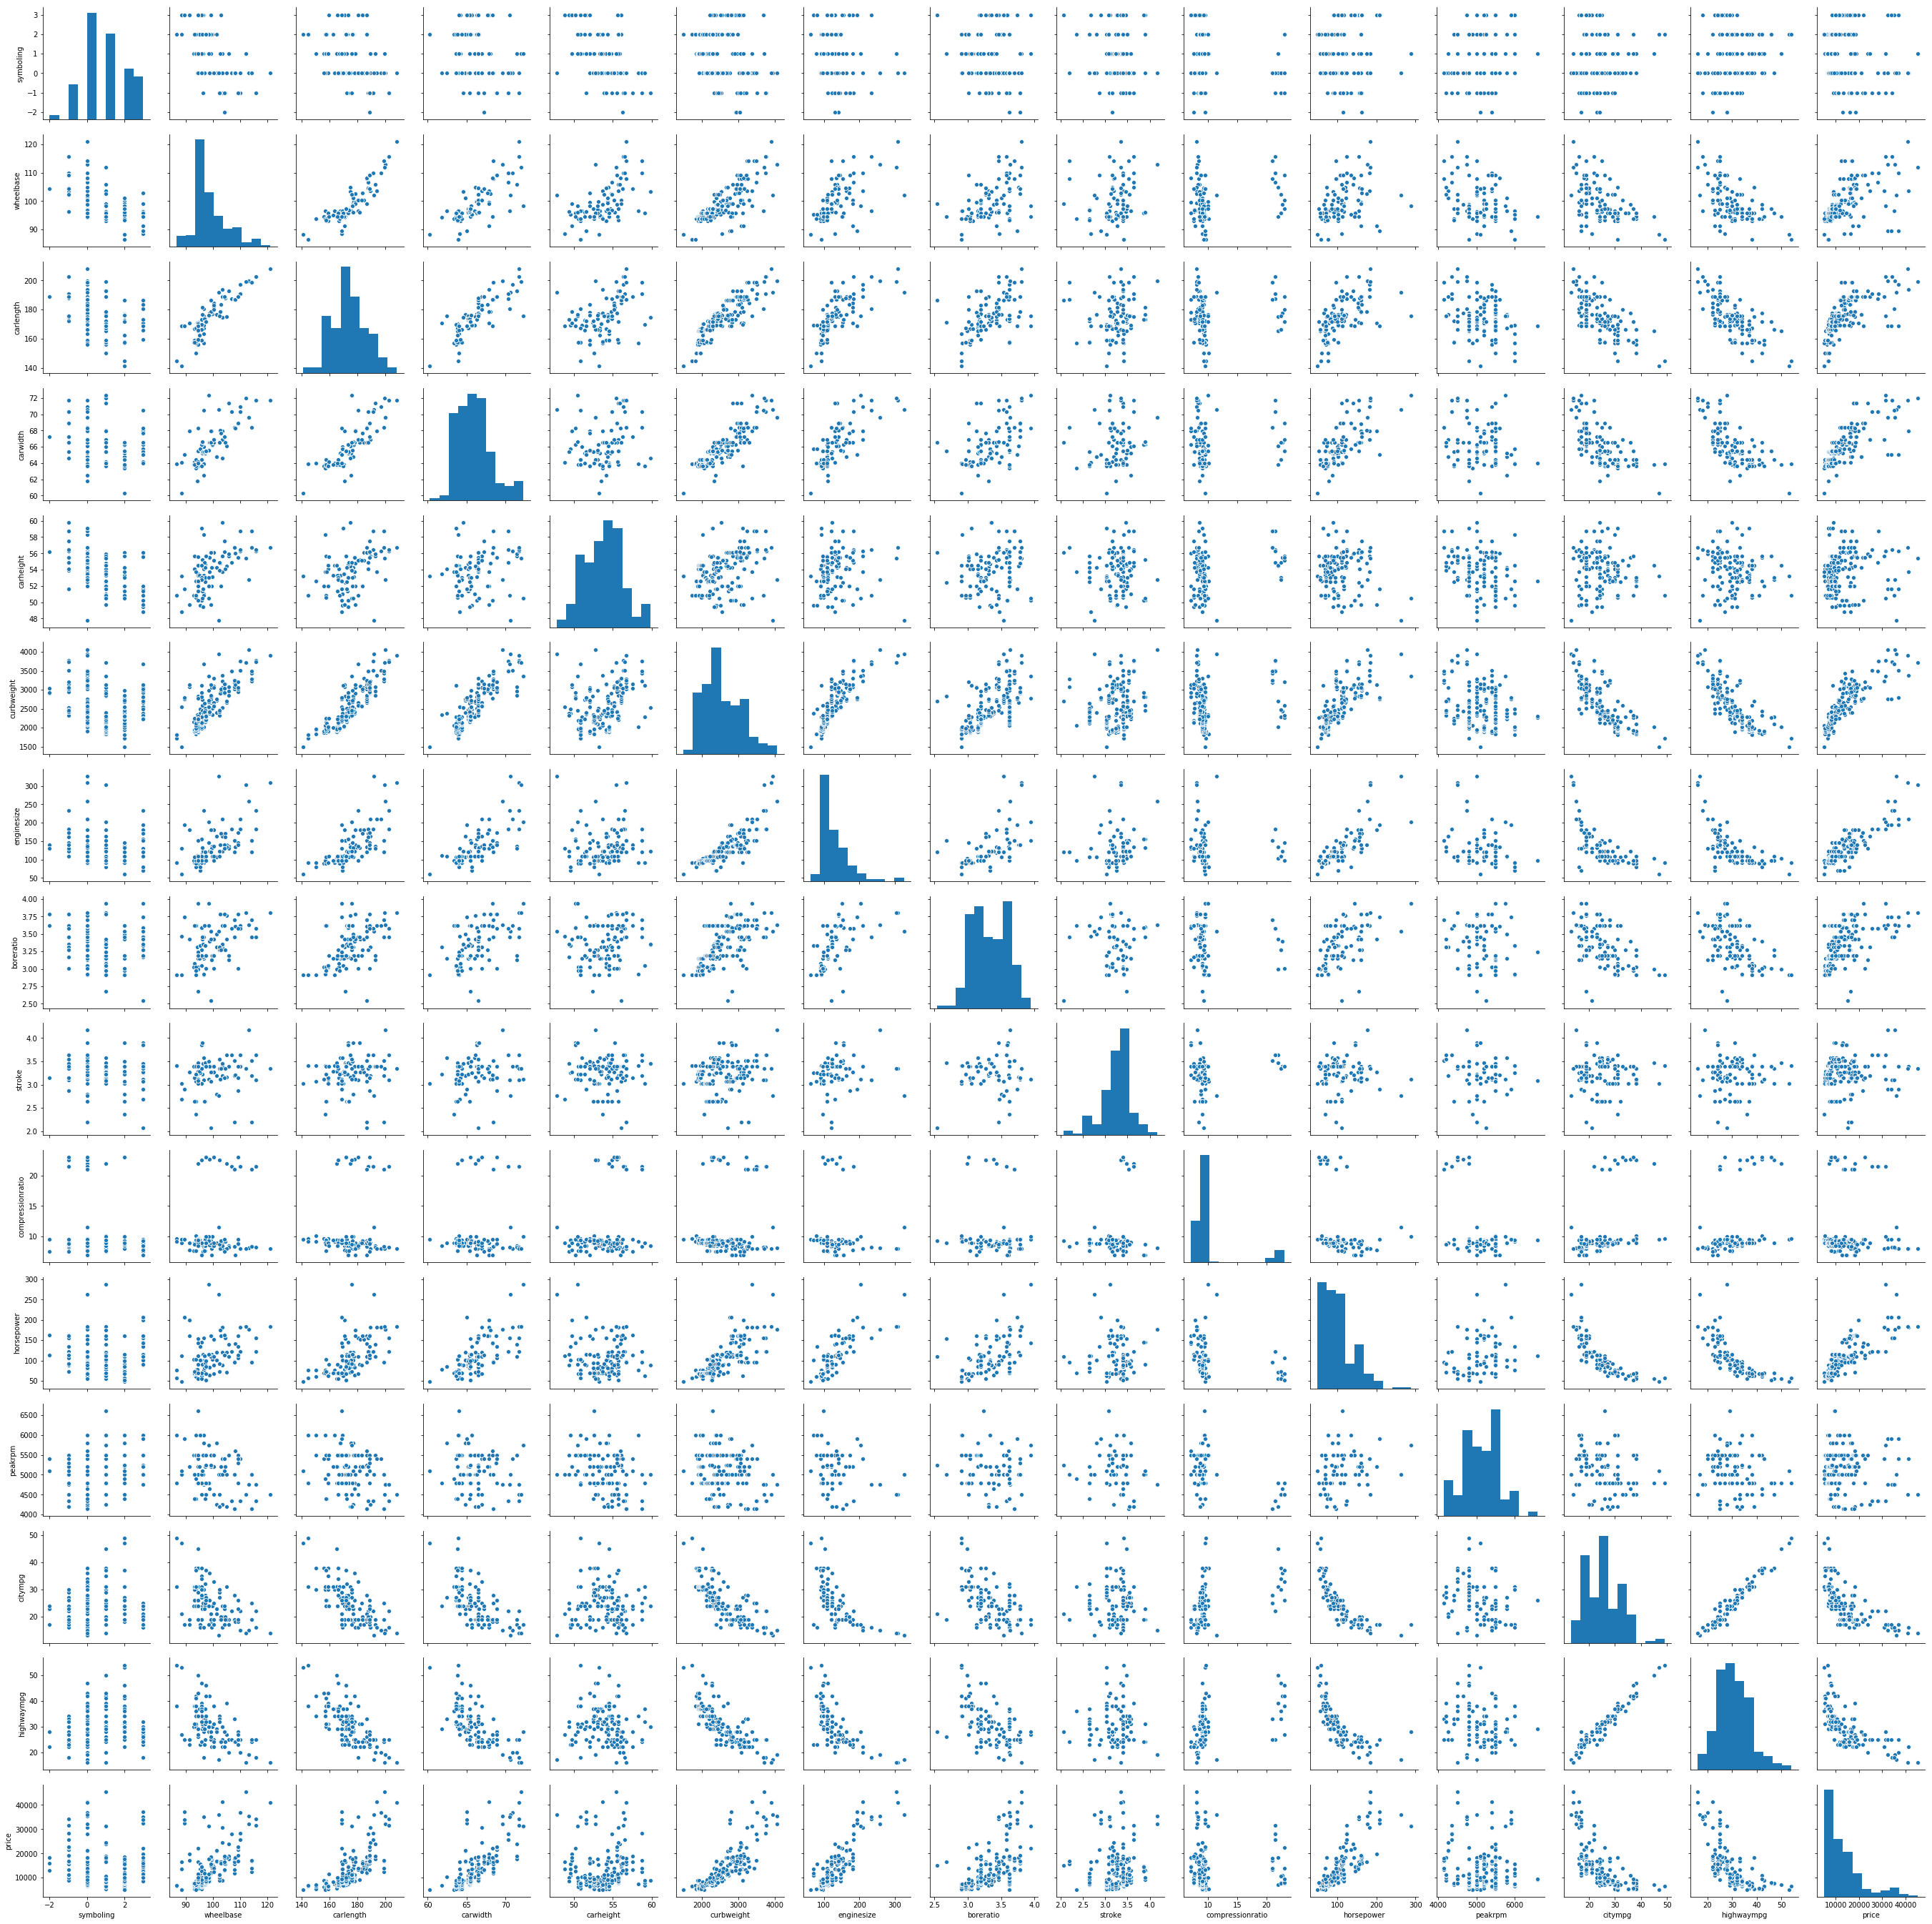

In [1457]:
#visualizing the data

sns.pairplot(df)
plt.show()

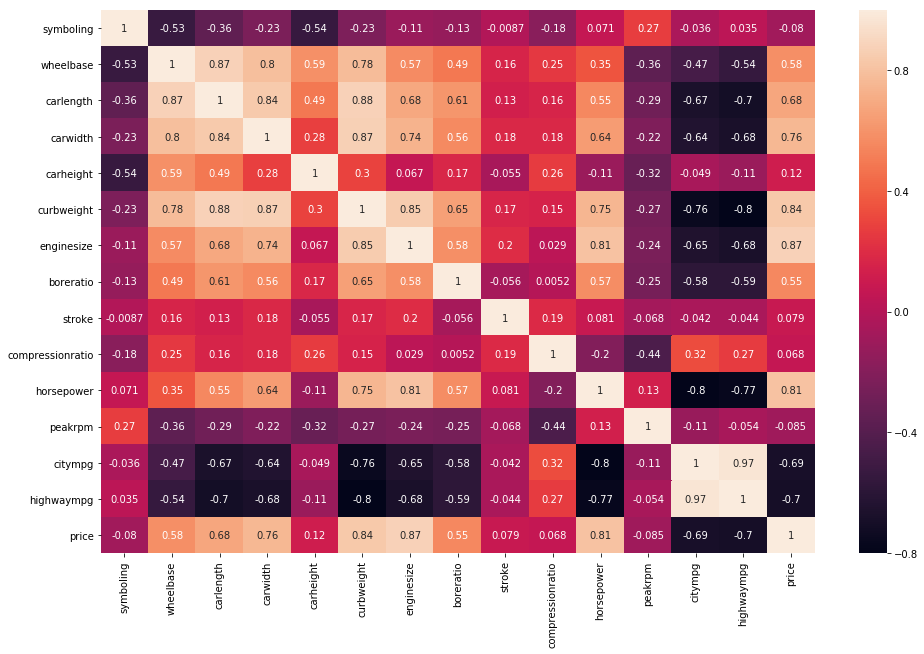

In [1309]:
#figure size

plt.figure(figsize=(16,10))

sns.heatmap(df.corr(),annot=True)

In [1459]:
df['symboling'].head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: int64

In [1462]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [1465]:
#Converting symboling as string so that dummies can be created for it -converting it to categorical variable column

df['symboling']=df['symboling'].astype(str)

In [1466]:
#list of variables with categorical data to make dummies

varlist=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','symboling','cylindernumber']


df1 = pd.get_dummies(df[varlist], drop_first = True)

In [1467]:
df1.head()

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [1468]:
# Add the results to the original dataframe

df = pd.concat([df, df1], axis = 1)

In [1469]:
#dropping the original columns
df.drop(varlist,axis=1,inplace=True)

In [1470]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,1,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,1,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,1,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,1,0,1,0,0,0,0,0


In [1471]:
#Splitting the Data into Training and Testing Sets

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [1473]:
scaler = MinMaxScaler()

In [1474]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio',
            'horsepower','peakrpm','citympg','highwaympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1475]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
3,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,...,0,0,1,0,0,1,0,0,0,0
157,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,...,1,0,0,0,0,1,0,0,0,0
81,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,...,0,0,0,1,0,1,0,0,0,0
32,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,...,0,1,0,0,0,1,0,0,0,0
99,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,...,1,0,0,0,0,1,0,0,0,0


In [1476]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000
mean,0.404605,0.519899,0.454726,0.482927,0.398579,0.236493,0.489983,0.542159,0.202866,0.221037,...,0.329268,0.292683,0.140244,0.128049,0.060976,0.762195,0.121951,0.006098,0.006098,0.02439
std,0.197731,0.197651,0.179980,0.205820,0.202330,0.148945,0.203913,0.153546,0.255795,0.164011,...,0.471387,0.456388,0.348303,0.335168,0.240018,0.427043,0.328232,0.078087,0.078087,0.15473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.272414,0.409756,0.308333,0.341667,0.247673,0.135849,0.293651,0.464646,0.098437,0.090625,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,0.341379,0.502439,0.425000,0.491667,0.347944,0.184906,0.468254,0.555556,0.125000,0.183333,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,0.475862,0.615041,0.516667,0.641667,0.522789,0.287736,0.682540,0.616162,0.150000,0.283333,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


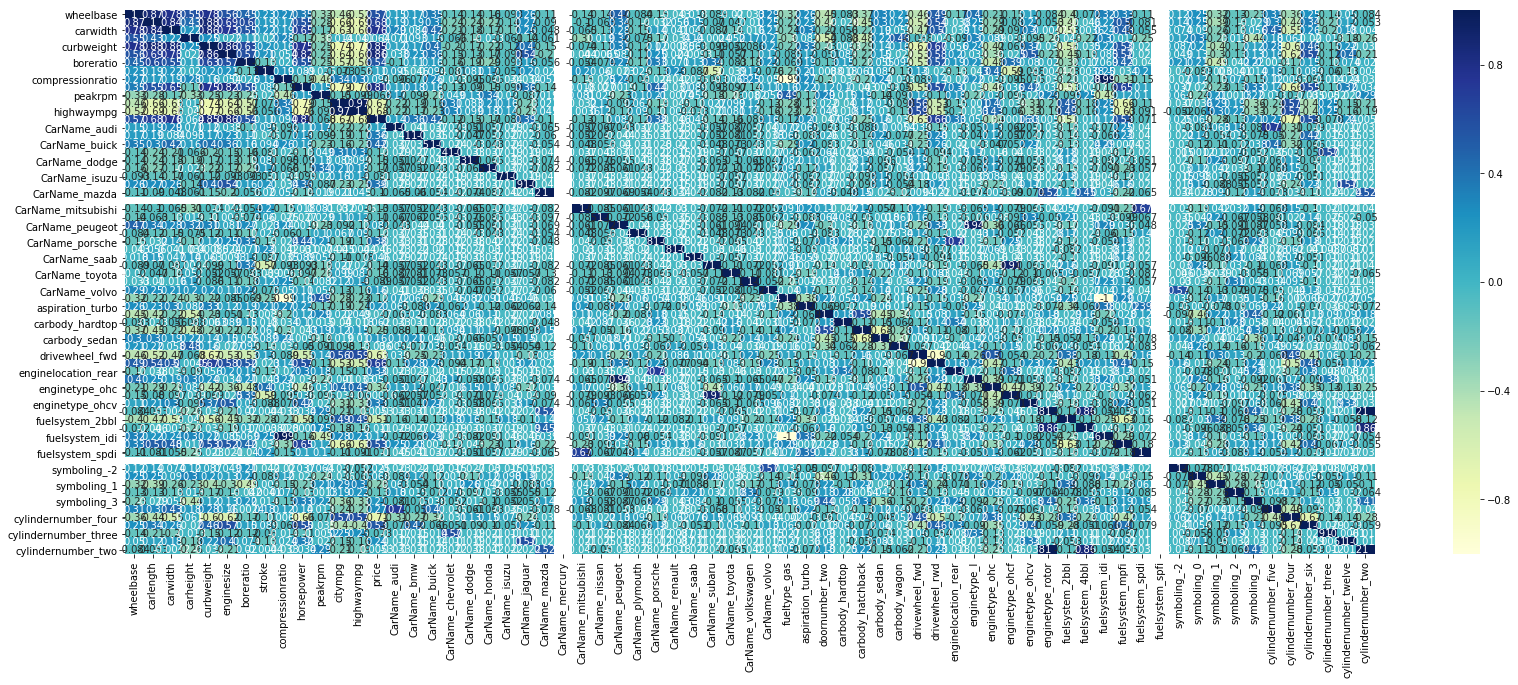

In [1477]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (28, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1478]:
for i in df_train.columns:
    print(i)
    print(df_train[i].corr(df_train['price']))
    print(' ')

wheelbase
0.5692410996775302
 
carlength
0.6842342570210662
 
carwidth
0.7620706491348112
 
carheight
0.06414324542023951
 
curbweight
0.8453445611174063
 
enginesize
0.8630114297941275
 
boreratio
0.5442094729521344
 
stroke
0.10863996952525903
 
compressionratio
0.09399400466759082
 
horsepower
0.8126075485389689
 
peakrpm
-0.06846943401602382
 
citympg
-0.6727831548793723
 
highwaympg
-0.6799938328562091
 
price
0.9999999999999999
 
CarName_audi
0.14038474376872537
 
CarName_bmw
0.3587451181540281
 
CarName_buick
0.42012855188639725
 
CarName_chevrolet
-0.12023466925636797
 
CarName_dodge
-0.1535297979762375
 
CarName_honda
-0.170931179933704
 
CarName_isuzu
-0.08108863756326024
 
CarName_jaguar
0.3887705532088578
 
CarName_mazda
-0.1022393599151786
 
CarName_mercury
nan
 
CarName_mitsubishi
-0.13132881757456027
 
CarName_nissan
-0.11442734238612387
 
CarName_peugeot
0.08203057183722817
 
CarName_plymouth
-0.12209382262327173
 
CarName_porsche
0.3785289177469346
 
CarName_renault
-0

In [1479]:
df_train[i].value_counts()

0    160
1      4
Name: cylindernumber_two, dtype: int64

In [1480]:
df_train.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
wheelbase,1.000000,0.869983,0.783199,0.551273,0.779234,0.561150,0.452273,0.227893,0.271104,0.348174,...,0.251228,-0.320953,-0.132918,-0.226654,0.306522,-0.356993,0.249452,-0.136103,0.050235,-0.083903
carlength,0.869983,1.000000,0.836833,0.431551,0.876835,0.691094,0.603726,0.187255,0.173712,0.546998,...,0.250128,-0.393625,-0.126207,-0.028685,0.302931,-0.440270,0.336322,-0.206659,0.120388,-0.053152
carwidth,0.783199,0.836833,1.000000,0.221943,0.859037,0.729659,0.548982,0.219791,0.191853,0.651416,...,0.090015,-0.260302,-0.126445,0.056013,0.431178,-0.550022,0.258465,-0.198500,0.176185,-0.004164
carheight,0.551273,0.431551,0.221943,1.000000,0.247977,0.021771,0.113141,0.019632,0.277401,-0.169250,...,0.301748,-0.231127,0.017916,-0.437977,0.179543,0.060550,-0.019694,-0.012569,-0.184344,-0.256543
curbweight,0.779234,0.876835,0.859037,0.247977,1.000000,0.864155,0.631190,0.202755,0.163525,0.752908,...,0.204850,-0.401329,-0.166625,0.121619,0.284642,-0.600283,0.456958,-0.154770,0.216063,-0.031709
enginesize,0.561150,0.691094,0.729659,0.021771,0.864155,1.000000,0.574091,0.212732,0.054153,0.823096,...,0.130502,-0.298746,-0.127819,0.133519,0.164676,-0.617968,0.572318,-0.124746,0.402737,-0.205612
boreratio,0.452273,0.603726,0.548982,0.113141,0.631190,0.574091,1.000000,-0.134697,0.026405,0.551212,...,0.209284,-0.487310,-0.042483,0.219073,-0.002366,-0.165633,0.147854,-0.118455,0.074191,0.020137
stroke,0.227893,0.187255,0.219791,0.019632,0.202755,0.212732,-0.134697,1.000000,0.189944,0.089270,...,-0.089371,-0.002955,0.004059,0.014270,0.175316,-0.107477,0.088560,-0.060336,-0.130110,-0.004421
compressionratio,0.271104,0.173712,0.191853,0.277401,0.163525,0.054153,0.026405,0.189944,1.000000,-0.194479,...,0.121551,-0.154012,0.071206,-0.147825,0.120794,0.006277,-0.064471,-0.014318,0.024075,-0.032778
horsepower,0.348174,0.546998,0.651416,-0.169250,0.752908,0.823096,0.551212,0.089270,-0.194479,1.000000,...,-0.021701,-0.229265,-0.131165,0.325963,0.138645,-0.662090,0.552725,-0.105883,0.321251,0.034051


In [1481]:
# we find the correlation for fuelsystem_spfi and CarName_mercury are NaN. After invespecting the data ,
#we find there is just one record for fuelsystem_spfi and CarName_mercury in the data set . Hence it can either 
#fall in train set or test set. In our case it fall in test set as shown below. Hence droppng the corresponding columns.

In [1482]:
df_train['fuelsystem_spfi'].value_counts()

0    164
Name: fuelsystem_spfi, dtype: int64

In [1483]:
df_train['CarName_mercury'].value_counts()

0    164
Name: CarName_mercury, dtype: int64

In [1484]:
df_test['fuelsystem_spfi'].value_counts()

0    40
1     1
Name: fuelsystem_spfi, dtype: int64

In [1485]:
df_test['CarName_mercury'].value_counts()

0    40
1     1
Name: CarName_mercury, dtype: int64

In [1486]:
df_train.drop(['fuelsystem_spfi','CarName_mercury'],axis=1,inplace=True)

In [1487]:
#checking coorelation after dropping the NaN columns
for i in df_train.columns:
    print(i)
    print(df_train[i].corr(df_train['price']))
    print(' ')

wheelbase
0.5692410996775302
 
carlength
0.6842342570210662
 
carwidth
0.7620706491348112
 
carheight
0.06414324542023951
 
curbweight
0.8453445611174063
 
enginesize
0.8630114297941275
 
boreratio
0.5442094729521344
 
stroke
0.10863996952525903
 
compressionratio
0.09399400466759082
 
horsepower
0.8126075485389689
 
peakrpm
-0.06846943401602382
 
citympg
-0.6727831548793723
 
highwaympg
-0.6799938328562091
 
price
0.9999999999999999
 
CarName_audi
0.14038474376872537
 
CarName_bmw
0.3587451181540281
 
CarName_buick
0.42012855188639725
 
CarName_chevrolet
-0.12023466925636797
 
CarName_dodge
-0.1535297979762375
 
CarName_honda
-0.170931179933704
 
CarName_isuzu
-0.08108863756326024
 
CarName_jaguar
0.3887705532088578
 
CarName_mazda
-0.1022393599151786
 
CarName_mitsubishi
-0.13132881757456027
 
CarName_nissan
-0.11442734238612387
 
CarName_peugeot
0.08203057183722817
 
CarName_plymouth
-0.12209382262327173
 
CarName_porsche
0.3785289177469346
 
CarName_renault
-0.04587713935921736
 
C

In [1488]:
#df_test.drop(['fuelsystem_spfi','CarName_mercury'],axis=1,inplace=True)

In [1489]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train


In [1490]:
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
3,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,...,0,0,1,0,0,1,0,0,0,0
157,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,...,1,0,0,0,0,1,0,0,0,0
81,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,...,0,0,0,1,0,1,0,0,0,0
32,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,...,0,1,0,0,0,1,0,0,0,0
99,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,...,1,0,0,0,0,1,0,0,0,0


In [1491]:
#Building a linear model using -RFE so that we can shortlist the features, and then proceed to manual elimination of features.

In [1492]:
lm=LinearRegression()

In [1493]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1494]:
#running RFE
rfe=RFE(lm,12)

In [1495]:
rfe=rfe.fit(X_train,y_train)

In [1496]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 10),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 36),
 ('horsepower', False, 19),
 ('peakrpm', False, 9),
 ('citympg', False, 8),
 ('highwaympg', False, 40),
 ('CarName_audi', False, 45),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 50),
 ('CarName_chevrolet', False, 24),
 ('CarName_dodge', False, 22),
 ('CarName_honda', False, 25),
 ('CarName_isuzu', False, 29),
 ('CarName_jaguar', False, 30),
 ('CarName_mazda', False, 33),
 ('CarName_mitsubishi', False, 17),
 ('CarName_nissan', False, 32),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 23),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 31),
 ('CarName_saab', False, 15),
 ('CarName_subaru', False, 5),
 ('CarName_toyota', False, 28),
 ('CarName_volkswagen', False, 27),
 ('CarName_volvo', False, 47),
 ('fueltype_gas', Fal

In [1497]:
#Picking columns which are selected
col=X_train.columns[rfe.support_]

In [1498]:
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_porsche', 'enginelocation_rear',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [1499]:
# Now building model using statsmodel for detailed statics
# running model on the top 20 selected columns
X_train_rfe=X_train[col]  

In [1501]:
#adding a constant variable
X_train_rfe=sm.add_constant(X_train_rfe)

In [1502]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [1503]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.16e-77
Time:                        23:17:39   Log-Likelihood:                -1493.1
No. Observations:                 164   AIC:                             3010.
Df Residuals:                     152   BIC:                             3047.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1694.98

In [1504]:
y_train_predict=lm.predict(X_train_rfe)

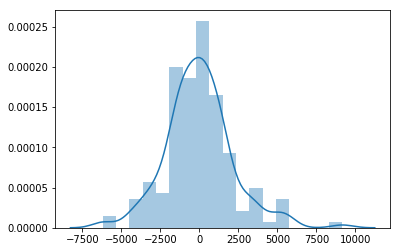

In [1505]:
sns.distplot(y_train-y_train_predict)

#As we can see it is overfitting. Hence we need to fix it by investigation of variables.

In [1506]:
y_test=df_test.pop('price')

In [1511]:
#hence including 

In [1512]:
#Building model manually by adding all the variables (Top down approach)

In [1513]:
# Check all the columns of the dataframe

#columns=[ 'carlength','carwidth','curbweight','enginesize','compressionratio','peakrpm',
#         'CarName_bmw','CarName_dodge','CarName_honda','CarName_mitsubishi','CarName_peugeot','CarName_renault',
#        'CarName_subaru','CarName_toyota','fueltype_gas','enginelocation_rear','enginetype_l','enginetype_ohcf',
#        'enginetype_rotor','fuelsystem_idi']

X_train=X_train[col]

In [1514]:
#Building a linear model
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                     1694.981559
carwidth                 11715.452063
curbweight               11017.614382
enginesize               23764.263010
boreratio                -5711.349350
stroke                   -4118.319284
CarName_bmw               8430.227527
CarName_porsche           5704.283226
enginelocation_rear      12381.689541
enginetype_rotor          3118.787048
cylindernumber_three      6245.732095
cylindernumber_twelve    -4953.072725
cylindernumber_two        3118.787048
dtype: float64

In [1515]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.16e-77
Time:                        23:17:43   Log-Likelihood:                -1493.1
No. Observations:                 164   AIC:                             3010.
Df Residuals:                     152   BIC:                             3047.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1694.98

In [1516]:
# Looking at the p values , we find above that some of the variables aren't really significant.

#Lets check the VIF to get an idea about how much the feature variables are correlated with each other

In [1517]:
# Checking VIF values of the feature variables. 

In [1519]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
1,curbweight,44.630000
0,carwidth,29.960000
2,enginesize,27.290000
3,boreratio,10.020000
4,stroke,7.790000
6,CarName_porsche,2.410000
7,enginelocation_rear,2.210000
10,cylindernumber_twelve,1.620000


In [1520]:
# Dropping highly correlated variables and insignificant variables
# after checking the p value and VIF , dropping drivewheel_rwd with high p value and high vif

X = X_train.drop('cylindernumber_twelve',axis=1)

In [1521]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [1522]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.07e-78
Time:                        23:17:45   Log-Likelihood:                -1494.5
No. Observations:                 164   AIC:                             3011.
Df Residuals:                     153   BIC:                             3045.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1259.4438 

In [1523]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
10,cylindernumber_two,inf
1,curbweight,40.450000
0,carwidth,29.750000
2,enginesize,18.680000
3,boreratio,9.960000
4,stroke,7.130000
6,CarName_porsche,2.350000
7,enginelocation_rear,2.200000
5,CarName_bmw,1.130000


In [1524]:
# Dropping highly correlated variables and insignificant variables
# after checking the p value and VIF , dropping symboling with high p value and high vif

X = X.drop('stroke',axis=1)

# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.29e-77
Time:                        23:17:46   Log-Likelihood:                -1497.8
No. Observations:                 164   AIC:                             3016.
Df Residuals:                     154   BIC:                             3047.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -473.1820 

In [1525]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype_rotor,inf
9,cylindernumber_two,inf
1,curbweight,39.350000
0,carwidth,22.600000
2,enginesize,18.560000
3,boreratio,9.630000
5,CarName_porsche,2.200000
6,enginelocation_rear,2.160000
4,CarName_bmw,1.130000
8,cylindernumber_three,1.010000


In [1526]:
# Dropping highly correlated variables and insignificant variables
# after checking the p value and VIF , dropping CarName_buick with high p value and high vif

X = X.drop('enginetype_rotor', 1,)

# Build fifth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.29e-77
Time:                        23:17:47   Log-Likelihood:                -1497.8
No. Observations:                 164   AIC:                             3016.
Df Residuals:                     154   BIC:                             3047.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -473.1820 

In [1527]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.35
0,carwidth,22.60
2,enginesize,18.56
3,boreratio,9.63
5,CarName_porsche,2.20
6,enginelocation_rear,2.16
8,cylindernumber_two,1.20
4,CarName_bmw,1.13
7,cylindernumber_three,1.01


In [1528]:
# Dropping highly correlated variables and insignificant variables
# after checking the p value and VIF , dropping fuelsystem_2bbl with high p value and high vif

X = X.drop('curbweight', axis=1)

# Build a sisth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.16e-74
Time:                        23:17:48   Log-Likelihood:                -1508.5
No. Observations:                 164   AIC:                             3035.
Df Residuals:                     155   BIC:                             3063.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1119.3533 

In [1529]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,14.69
1,enginesize,10.12
2,boreratio,9.21
5,enginelocation_rear,2.16
4,CarName_porsche,2.10
7,cylindernumber_two,1.15
3,CarName_bmw,1.13
6,cylindernumber_three,1.01


In [1530]:
# Dropping highly correlated variables and insignificant variables
# after checking the p value and VIF , dropping carwidth with high vif

X = X.drop('carwidth', axis=1)

# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.45e-59
Time:                        23:17:48   Log-Likelihood:                -1547.4
No. Observations:                 164   AIC:                             3111.
Df Residuals:                     156   BIC:                             3136.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2127.2388 

In [1531]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.91
1,boreratio,5.89
3,CarName_porsche,2.10
4,enginelocation_rear,2.02
2,CarName_bmw,1.10
6,cylindernumber_two,1.10
5,cylindernumber_three,1.00


In [1532]:
# Dropping highly correlated variables and insignificant variables
# after checking the p value and VIF , dropping horsepower with high p value and high vif

X = X.drop('boreratio', axis=1)

# Build 8th fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.17e-60
Time:                        23:17:49   Log-Likelihood:                -1547.4
No. Observations:                 164   AIC:                             3109.
Df Residuals:                     157   BIC:                             3131.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2077.0632 

In [1533]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CarName_porsche,2.07
3,enginelocation_rear,2.00
0,enginesize,1.17
1,CarName_bmw,1.09
4,cylindernumber_three,1.00
5,cylindernumber_two,1.00


In [1534]:
# Dropping highly correlated variables and insignificant variables
# after checking the p value and VIF , dropping fueltype_gas with high p value and high vif

X = X.drop('cylindernumber_three', axis=1)

# Build a 9th fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.38e-61
Time:                        23:17:50   Log-Likelihood:                -1547.9
No. Observations:                 164   AIC:                             3108.
Df Residuals:                     158   BIC:                             3126.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2150.0872    

In [1535]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CarName_porsche,2.07
3,enginelocation_rear,2.00
0,enginesize,1.17
1,CarName_bmw,1.09
4,cylindernumber_two,1.00


In [1536]:
'''lr_8 is our final model.
It has 5 predictors.
ALl of them have a p value of less than 0.05, hence are significant.
Also, all of them have a VIF value of less than 5, which means that they are not correlated with each other.'''

'lr_8 is our final model.\nIt has 5 predictors.\nALl of them have a p value of less than 0.05, hence are significant.\nAlso, all of them have a VIF value of less than 5, which means that they are not correlated with each other.'

In [1543]:
df_test[num_vars]=scaler.transform(df_test[num_vars])
X_test=df_test[X.columns]


In [1545]:
X.columns

Index(['enginesize', 'CarName_bmw', 'CarName_porsche', 'enginelocation_rear',
       'cylindernumber_two'],
      dtype='object')

In [1546]:
#X_test=df_test[X.columns]

In [1547]:
X_test_lm=sm.add_constant(X_test)

In [1548]:
X_test_lm.head()

,const,enginesize,CarName_bmw,CarName_porsche,enginelocation_rear,cylindernumber_two
160,1.0,0.139623,0,0,0,0
186,1.0,0.181132,0,0,0,0
59,1.0,0.230189,0,0,0,0
165,1.0,0.139623,0,0,0,0
140,1.0,0.177358,0,0,0,0


In [1549]:
y_test_pred=lr_8.predict(X_test_lm)

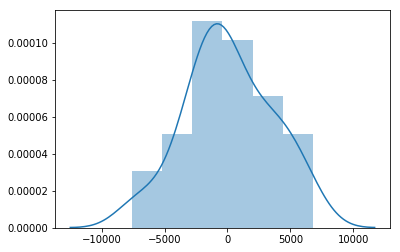

In [1550]:
#Calculating residual 
res_test=y_test-y_test_pred
sns.distplot(res_test)
# we see that it is centered about 0 (mean=0). hence our assumption is true

In [1555]:
#checking r2 score of train data
y_train_pred=lr_8.predict(sm.add_constant(X))
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8428160045386588

In [1552]:
#checking r2 score of test data
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8465476481052716

In [ ]:
'''Checking the r2 score of test and train, we see that there is very little difference.
Hence we can say that our model is accurate to about 84%'''